In [222]:
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [223]:
PATH = "../fio/read"
EXT = "*.log"

In [224]:
#load data
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [225]:
all_csv_files.sort()
all_csv_files

['../fio/read/trace_read16B_bw.log',
 '../fio/read/trace_read16B_lat.log',
 '../fio/read/trace_read4B_bw.log',
 '../fio/read/trace_read4B_lat.log',
 '../fio/read/trace_read64B_bw.log',
 '../fio/read/trace_read64B_lat.log']

In [226]:
#read csv data 
#pd.options.display.float_format = '{:.6f}'.format
#date d'arrivée --> milliseconde
#bw/lat---> KiB/sec|nanoseconde 
#type---> read=0|write=1 
#taille/offset---> Bytes
df_read = [pd.read_csv(file, delimiter=",", names=["date", "bw|lat", "type","taille", "offset", "prio"]) 
                                             for file in all_csv_files]

In [227]:
df_read[0].columns

Index(['date', 'bw|lat', 'type', 'taille', 'offset', 'prio'], dtype='object')

In [218]:
#convertisseur 
ms_to_sec = 1e-3
ns_to_sec = 1e-9
kib_to_kb = 1.024

**Representations graphiques des latences pour les différentes tailles**

In [234]:
#Latence respectivements pour les tailles 4B, 16B, 64B
df_read_lat = [df_read[3], df_read[1],df_read[5]]

df_read_lat[1].head()

,date,bw|lat,type,taille,offset,prio
0,0,348418,0,16,0,0
1,0,4820,0,16,16,0
2,0,2767,0,16,32,0
3,0,2727,0,16,48,0
4,0,2743,0,16,64,0


In [252]:
pd.options.display.float_format = '{:.8f}'.format
print((df_read_lat[0]["bw|lat"].describe())*ns_to_sec)

count   0.00025000
mean    0.00000131
std     0.00000107
min     0.00000113
25%     0.00000115
50%     0.00000116
75%     0.00000116
max     0.00035295
Name: bw|lat, dtype: float64


In [183]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_read_lat_mean = [df.groupby(["date"], as_index=False).mean() for df in df_read_lat]
df_read_lat_mean[0].tail()

,date,bw|lat,type,taille,offset,prio
471,471,1262.955638,0.000000,4.000000,989708.000000,0.000000
472,472,1155.904132,0.000000,4.000000,992000.000000,0.000000
473,473,1328.015474,0.000000,4.000000,994244.000000,0.000000
474,474,1154.137190,0.000000,4.000000,996488.000000,0.000000
475,475,1158.107826,0.000000,4.000000,998848.000000,0.000000


In [184]:
#données des lectures seq par une taille de 4 bytes
begin_time_lat4 = df_read_lat_mean[0]["date"][0]
x_lat4 = (df_read_lat_mean[0]["date"] - begin_time_lat4)*ms_to_sec
y_lat4 = (df_read_lat_mean[0]["bw|lat"])*ns_to_sec
y_lat4.head()

0   0.000023
1   0.000002
2   0.000002
3   0.000002
4   0.000003
Name: bw|lat, dtype: float64

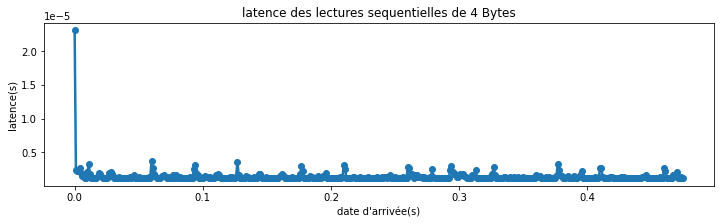

In [185]:
#plot des latences des lectures seq par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat4, y_lat4, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des lectures sequentielles de 4 Bytes')
plt.savefig("../outplot_fio/read/seq/latence/read4B.png")
plt.show()

In [186]:
#données des lectures seq par une taille de 16 bytes
begin_time_lat16 = df_read_lat_mean[1]["date"][0]
x_lat16 = (df_read_lat_mean[1]["date"] - begin_time_lat16)*ms_to_sec
y_lat16 = (df_read_lat_mean[1]["bw|lat"])*ns_to_sec
y_lat16.head()

0   0.000010
1   0.000003
2   0.000003
3   0.000004
4   0.000003
Name: bw|lat, dtype: float64

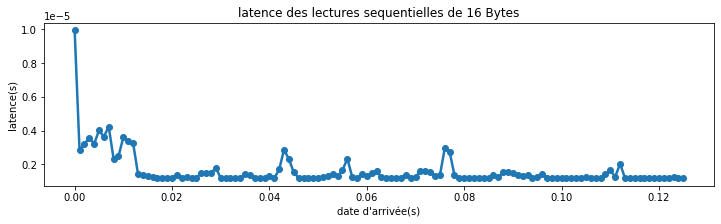

In [187]:
#plot des données des lectures seq par une taille de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat16, y_lat16, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des lectures sequentielles de 16 Bytes')
plt.savefig("../outplot_fio/read/seq/latence/read16B.png")
plt.show()

In [202]:
#données des lectures seq par une taille de 64 bytes
begin_time_lat64 = df_read_lat_mean[2]["date"][0]
x_lat64 = (df_read_lat_mean[2]["date"] - begin_time_lat64)*ms_to_sec
y_lat64 = (df_read_lat_mean[2]["bw|lat"])*ns_to_sec
y_lat64.head()

0   0.000142
1   0.000003
2   0.000002
3   0.000003
4   0.000001
Name: bw|lat, dtype: float64

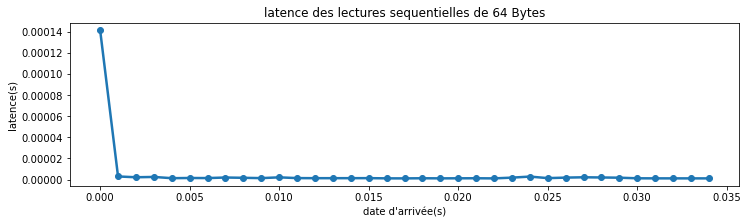

In [204]:
#plot des données des lectures seq par une taille de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat64, y_lat64, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des lectures sequentielles de 64 Bytes')
plt.savefig("../outplot_fio/read/seq/latence/read64B.png")
plt.show()

**Representations graphiques des bandwiths pour les différentes tailles**

In [220]:
#Bandwiths respectivements pour les tailles 4B, 16B, 64B
df_read_bw = [df_read[2], df_read[0],df_read[4]]

In [221]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_read_bw_mean = [df.groupby(["date"], as_index=False).mean() for df in df_read_bw]
df_read_bw_mean[0].head()

,date,bw|lat,type,taille,offset,prio
0,0,1713.000000,0.000000,4.000000,32.000000,0.000000
1,1,1900.354839,0.000000,4.000000,624.000000,0.000000
2,2,1949.616438,0.000000,4.000000,1766.000000,0.000000
3,3,1898.555944,0.000000,4.000000,2922.000000,0.000000
4,4,1979.691057,0.000000,4.000000,3986.000000,0.000000


In [191]:
#données(bw) des lectures seq par une taille de 4 bytes
begin_time_bw4 = df_read_bw_mean[0]["date"][0]
x_bw4 = (df_read_bw_mean[0]["date"] - begin_time_bw4)*ms_to_sec
y_bw4 = (df_read_bw_mean[0]["bw|lat"])*kib_to_kb
y_bw4.head()

0   1754.112000
1   1945.963355
2   1996.407233
3   1944.121287
4   2027.203642
Name: bw|lat, dtype: float64

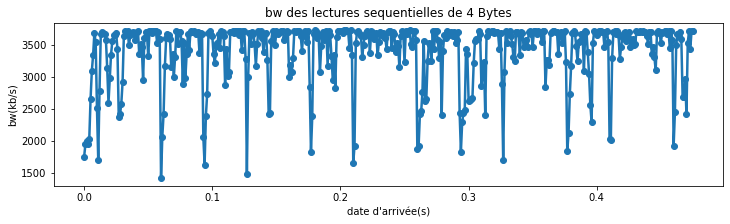

In [192]:
#plot des bw des lectures seq par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw4, y_bw4, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures sequentielles de 4 Bytes')
plt.savefig("../outplot_fio/read/seq/bw/read4B.png")
plt.show()

In [193]:
#données(bw) des lectures seq par une taille de 16 bytes
begin_time_bw16 = df_read_bw_mean[1]["date"][0]
x_bw16 = (df_read_bw_mean[1]["date"] - begin_time_bw16)*ms_to_sec
y_bw16 = (df_read_bw_mean[1]["bw|lat"])*kib_to_kb
y_bw16.head()

0   6149.909333
1   6300.493733
2   5683.362692
3   5169.968962
4   5551.304784
Name: bw|lat, dtype: float64

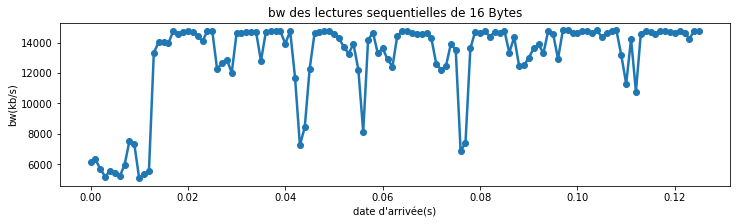

In [194]:
#plot des bw des lectures seq par un pas de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw16, y_bw16, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures sequentielles de 16 Bytes')
plt.savefig("../outplot_fio/read/seq/bw/read16B.png")
plt.show()

In [195]:
#données(bw) des lectures seq par une taille de 64 bytes
begin_time_bw64 = df_read_bw_mean[2]["date"][0]
x_bw64 = (df_read_bw_mean[2]["date"] - begin_time_bw64)*ms_to_sec
y_bw64 = (df_read_bw_mean[2]["bw|lat"])*kib_to_kb
y_bw64.head()

0   16588.103680
1   27801.298563
2   33281.656845
3   33839.573333
4   50299.998968
Name: bw|lat, dtype: float64

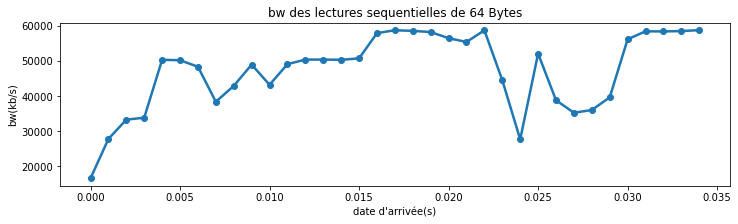

In [196]:
#plot des bw des lectures seq par un pas de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw64, y_bw64, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures sequentielles de 64 Bytes')
plt.savefig("../outplot_fio/read/seq/bw/read64B.png")
plt.show()